# P&D Explanatory Data Analysis

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [3]:
df_original = pd.read_csv("pump_history_0831.csv", parse_dates=['date'],index_col = ['date'])

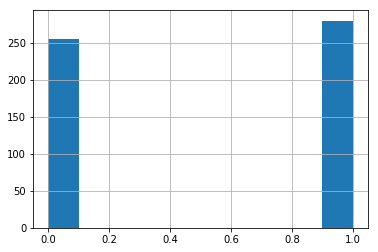

In [4]:
#define successful coin
df_successful = df_original[df_original["theoretical profit(%)"] > 0.05]
df_successful['success'] = 1
df_unsuccessful = df_original[df_original["theoretical profit(%)"] <= 0.05]
df_unsuccessful['success'] = 0
df = pd.concat([df_successful, df_unsuccessful])
df = df.sort_index()
df['success'].hist()

In [5]:
#make exchange dummy variable
df = df.replace({'exchange': {'Yobit':1, 'Binance':0, "Bittrex": 0}})
#fill NaN
df = df.fillna(0)

In [6]:
#import coin information
df_coin = pd.read_csv("coin_ranking_0902.csv")
df_coin.shape

(2349, 10)

In [7]:
#create new columns
df['ranked'] = 0
df['coin cap'] = 0
df['coin ranking'] = 0
df['coin volume'] = 0

In [8]:
#match the two data sheet with top 1264 coins
for idx in range(0, df.shape[0]):
    for idx2 in range(0, 1265):
        if df['currency'].iloc[idx] == df_coin['Symbol'].iloc[idx2]:
            df['ranked'].iloc[idx] = 1
            df['coin cap'].iloc[idx] = float(df_coin['Market Cap'].iloc[idx2])
            df['coin ranking'].iloc[idx] = int(df_coin['Ranking'].iloc[idx2])
            df['coin volume'].iloc[idx] = float(df_coin['Volume (24h)'].iloc[idx2])
#df_newinfo = df

In [9]:
#get time information
df['month']= df.index.month
df['weekday']= df.index.weekday
df['hour']= df.index.hour

<BarContainer object of 64 artists>

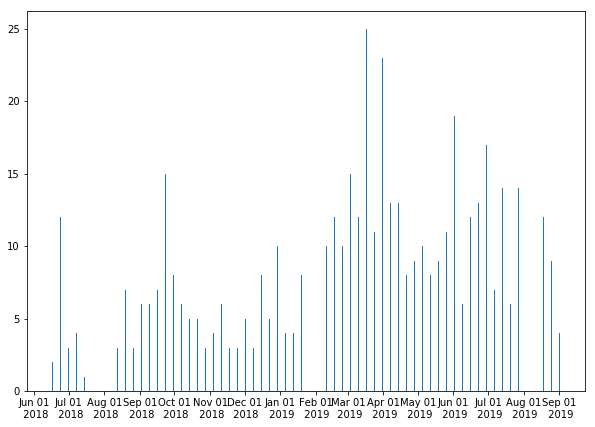

In [10]:
import matplotlib.dates as mdates
#get time series data
df_original['count'] = 1
df_week = df_original.resample('W').sum() 
fig, ax = plt.subplots(figsize=(10,7))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d\n %Y'))
ax.bar(df_week.index, df_week['count'])

In [11]:
#time zone
df_dates = df_original.set_index([df_original.index.year, df_original.index.month, df_original.index.day, df_original.index.weekday,
                            df_original.index.hour, df_original.index])
df_dates.index.names = ['year', 'month', 'day','weekday', 'hour', 'date']
df_dates.head()

order  \
year month day weekday hour date                         
2019 8     31  5       12   2019-08-31 12:37:54      1   
                       1    2019-08-31 01:41:30      2   
           30  4       4    2019-08-30 04:46:43      3   
                       3    2019-08-30 03:00:16      4   
           25  6       2    2019-08-25 02:00:03      5   

                                                                     channel  \
year month day weekday hour date                                               
2019 8     31  5       12   2019-08-31 12:37:54  Hot Signals Binance Bittrex   
                       1    2019-08-31 01:41:30           Bitcoin Pump Group   
           30  4       4    2019-08-30 04:46:43         Bitcoin Profit Coach   
                       3    2019-08-30 03:00:16       Global Pump Signals ??   
           25  6       2    2019-08-25 02:00:03                   Big signal   

                                                 subscriber_0901 currency  \
year month day weekday hour date                                            
2019 8     31  5       12   2019-08-31 12:37:54              NaN      KMD   
                       1    2019-08-31 01:41:30          32202.0      WAN   
           30  4       4    2019-08-30 04:46:43           8480.0      QSP   
                       3    2019-08-30 03:00:16           6071.0      QSP   
           25  6       2    2019-08-25 02:00:03            601.0      GVT   

                                                exchange  duration  volume  \
year month day weekday hour date                                             
2019 8     31  5       12   2019-08-31 12:37:54  Binance       211    5.28   
                       1    2019-08-31 01:41:30  Binance       132  893.97   
           30  4       4    2019-08-30 04:46:43  Binance       607   91.10   
                       3    2019-08-30 03:00:16  Binance        74   53.04   
           25  6       2    2019-08-25 02:00:03    Yobit       259    0.08   

                                                 price before pump  max price  \
year month day weekday hour date                                                
2019 8     31  5       12   2019-08-31 12:37:54           0.000072   0.000073   
                       1    2019-08-31 01:41:30           0.000034   0.000040   
           30  4       4    2019-08-30 04:46:43           0.000001   0.000001   
                       3    2019-08-30 03:00:16           0.000001   0.000002   
           25  6       2    2019-08-25 02:00:03           0.000140   0.000500   

                                                 our buy price  our profit(%)  \
year month day weekday hour date                                                
2019 8     31  5       12   2019-08-31 12:37:54       0.000073         0.0055   
                       1    2019-08-31 01:41:30            NaN            NaN   
           30  4       4    2019-08-30 04:46:43       0.000001         0.0079   
                       3    2019-08-30 03:00:16       0.000001         0.1429   
           25  6       2    2019-08-25 02:00:03       0.000205         1.4378   

                                                 theoretical buy price  \
year month day weekday hour date                                         
2019 8     31  5       12   2019-08-31 12:37:54               0.000073   
                       1    2019-08-31 01:41:30               0.000039   
           30  4       4    2019-08-30 04:46:43               0.000001   
                       3    2019-08-30 03:00:16               0.000001   
           25  6       2    2019-08-25 02:00:03               0.000147   

                                                 theoretical profit(%)  \
year month day weekday hour date                                         
2019 8     31  5       12   2019-08-31 12:37:54                 0.0055   
                       1    2019-08-31 01:41:30                 0.0248   
           30  4       4    2019-08-30 04:4

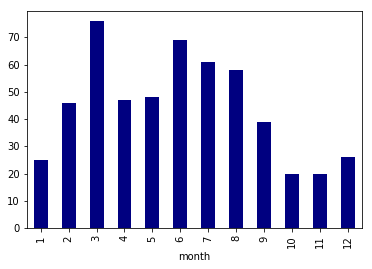

In [12]:
#sorted by month
df_dates['count'].sum(level='month').sort_index().plot.bar(color='navy')

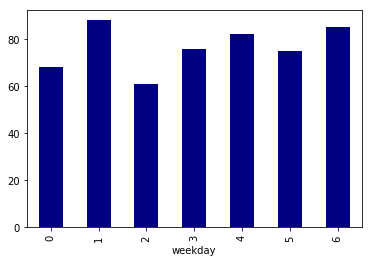

In [13]:
#sorted by weekday
df_dates['count'].sum(level='weekday').sort_index().plot.bar(color='navy')

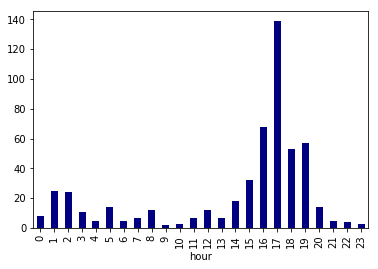

In [14]:
#sorted by hour
df_dates['count'].sum(level='hour').sort_index().plot.bar(color='navy')

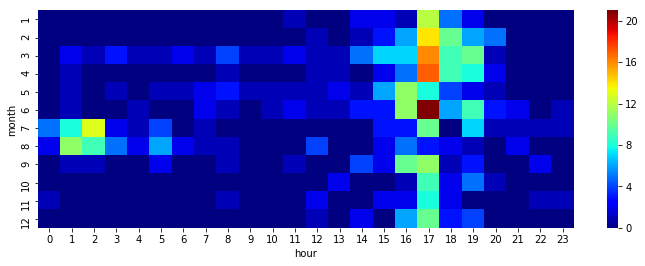

In [15]:
#heatmap by month and hour
plt.figure(figsize=(12, 4))
sns.heatmap(df_dates['count'].sum(level=['month', 'hour']).sort_index().unstack(level='hour').fillna(0),cmap="jet") #annot=True,

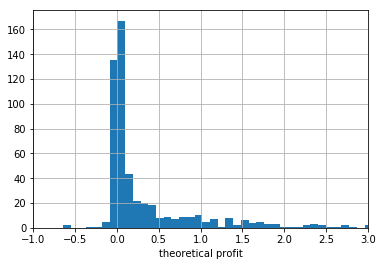

In [16]:
#theoretical profit
plt.hist(df['theoretical profit(%)'], bins =100)
plt.xlabel('theoretical profit')
plt.xlim(-1, 3)
plt.grid(True)

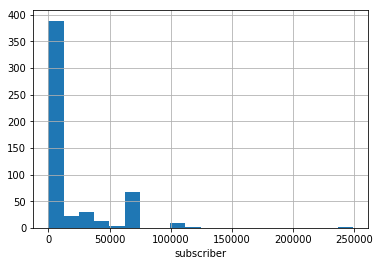

In [17]:
#subscriber
plt.hist(df['subscriber_0901'], bins =20)
plt.xlabel('subscriber')
plt.grid(True)

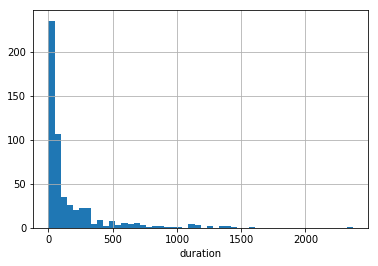

In [18]:
#duration
plt.hist(df['duration'], bins = 50)
plt.xlabel('duration')
plt.grid(True)

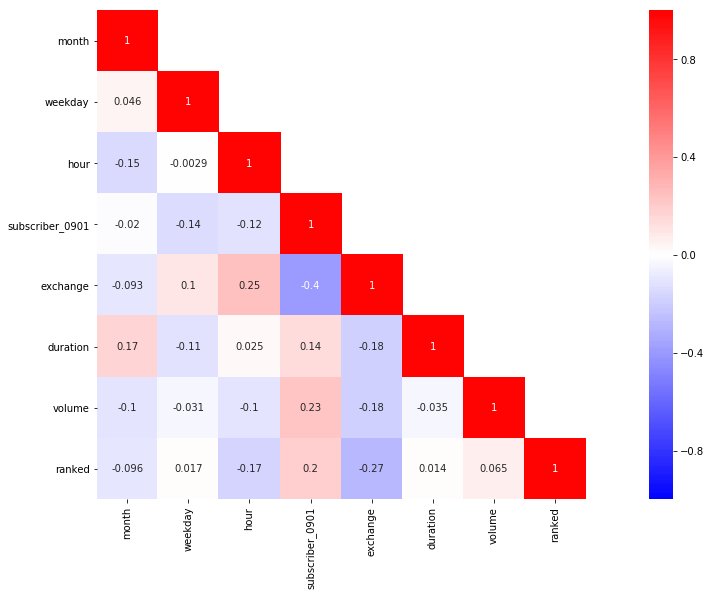

In [22]:
#partial correlation matrix
variables = df[['month', 'weekday', 'hour', 'subscriber_0901','exchange',
        'duration','volume','ranked']]
cor_mat= variables[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(22.5,9)
cmap = sns.color_palette("bwr", 200)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True, cmap = cmap, vmin= -1, vmax = 1)